In [133]:
import numpy as np
import pandas as pd
import folium as fo
import geopy 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
data=pd.read_csv("AB_NYC_2019.csv")

In [135]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [136]:
met=data["name"].mode()
data["name"].fillna(met.iloc[0],inplace=True)

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [138]:
data=data.drop(columns=["id","host_name","last_review"])

In [139]:
data.isnull().any()

name                              False
host_id                           False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [141]:

data["reviews_per_month"].fillna(value=data["reviews_per_month"].mean(),inplace=True)


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [143]:
data=data.dropna()

In [144]:
data.isnull().any().any()

False

In [145]:
data["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [146]:
data["neighbourhood"].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [147]:
data["room_type"].unique()


array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [148]:
data.isnull().any()

name                              False
host_id                           False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [149]:
net=data["host_id"].value_counts()
net.index[:10]

Int64Index([219517861, 107434423,  30283594, 137358866,  16098958,  12243051,
             61391963,  22541573, 200380610,   7503643],
           dtype='int64')

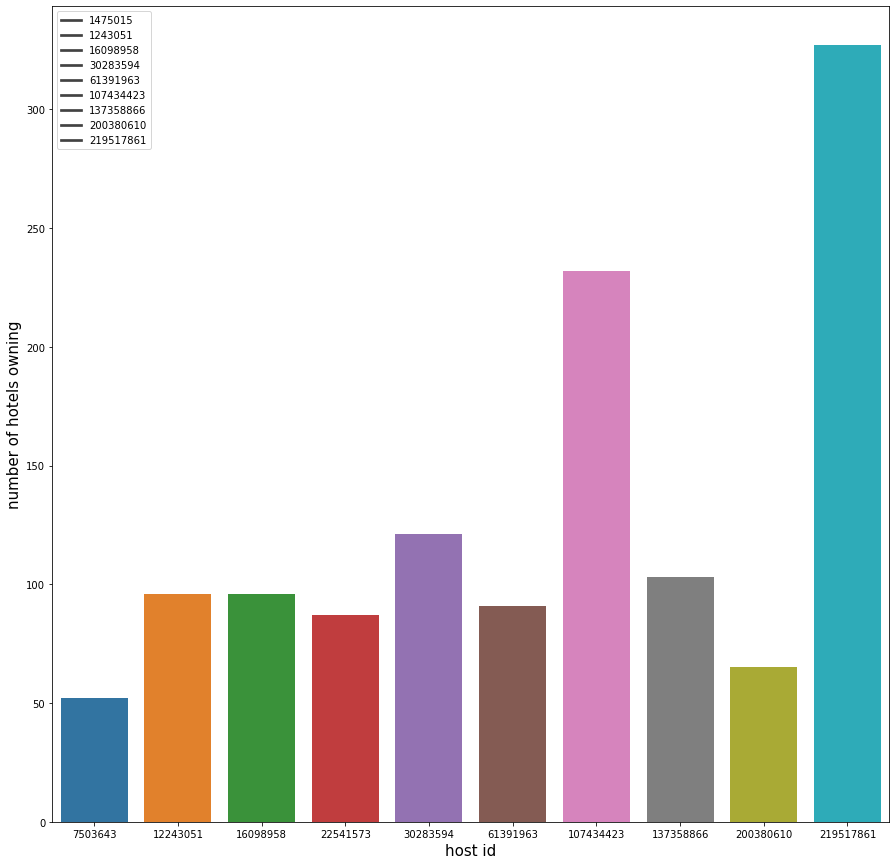

In [150]:
plt.figure(figsize=(15,15))
sns.barplot(data=data,x=net.index[:10],y=net.values[:10])
plt.xlabel("host id",size=15)
plt.ylabel("number of hotels owning",size=15)
plt.legend(["1475015","1243051","16098958","30283594","61391963","107434423","137358866","200380610","219517861"])
plt.show()

we can see 219517861 has more 300+ listings or owned

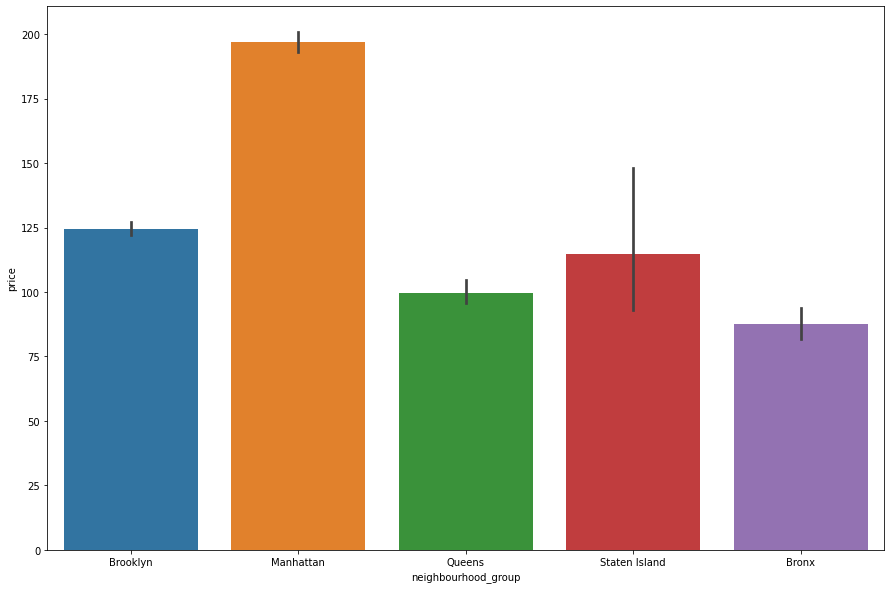

In [151]:
plt.figure(figsize=(15,10))
sns.barplot(data=data,x=data["neighbourhood_group"],y=data["price"])
plt.show()

## we can say price of manhattan neighbour hood is more costy


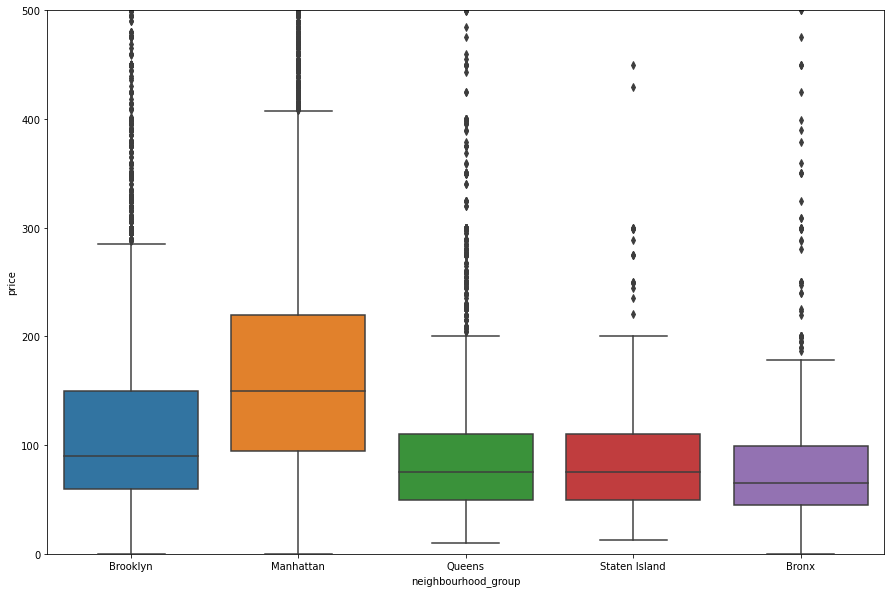

In [152]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data,x=data["neighbourhood_group"],y=data["price"])
plt.ylim(0,500)
plt.show()

In [153]:
cot=data["price"].value_counts()
cot.loc[10000]

3

[]

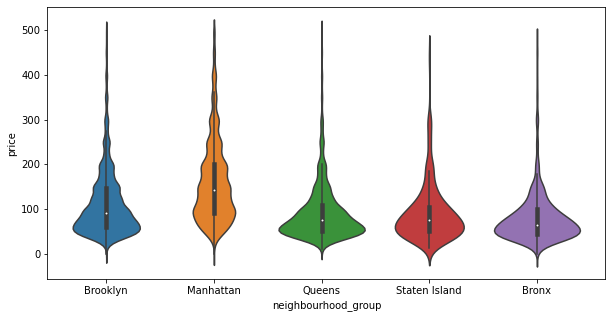

In [154]:
plt.figure(figsize=(10,5))
df=data["price"]<500
sns.violinplot(data=data[df],x="neighbourhood_group",y="price")
plt.plot()

In [155]:
one=data["neighbourhood_group"]=="Manhattan"

[]

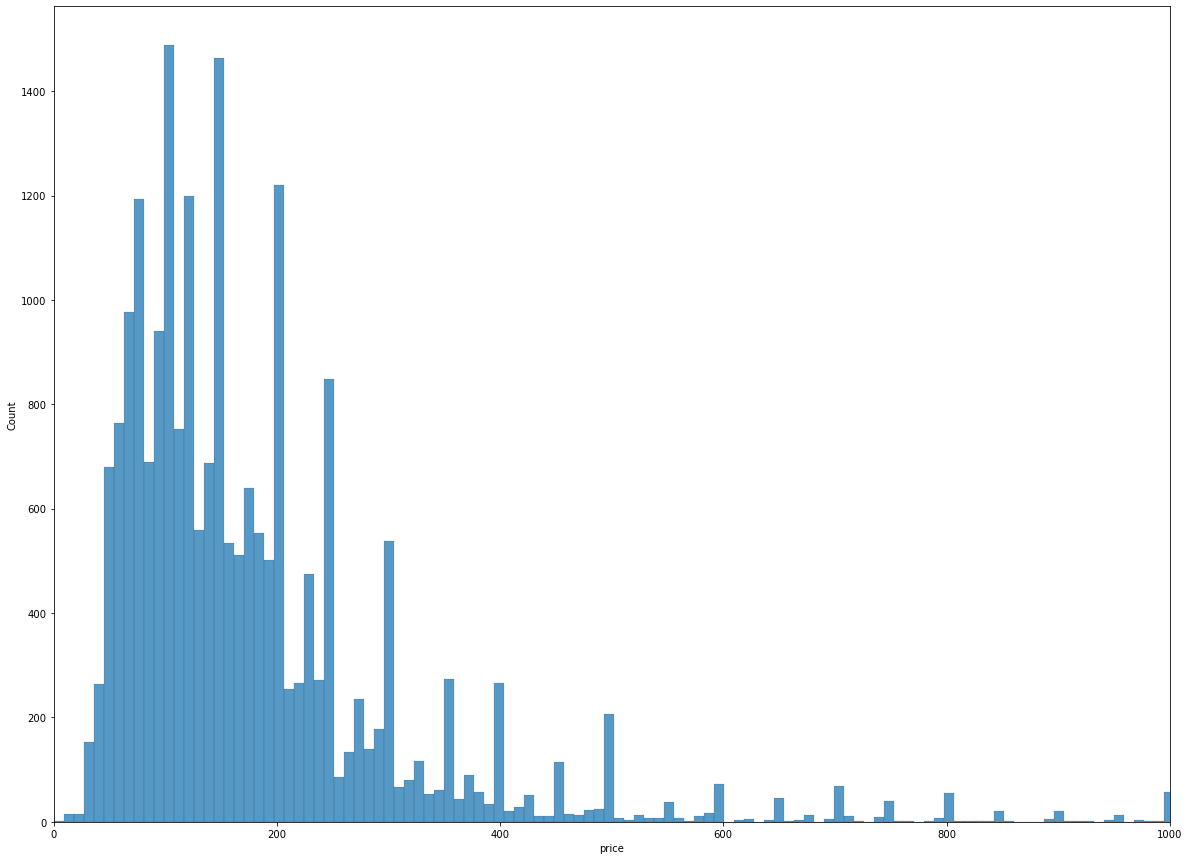

In [156]:
plt.figure(figsize=(20,15))
sns.histplot(data=data[one],x="price")
plt.xlim(0,1000)
plt.plot()

In [157]:

Q1=data.groupby("neighbourhood_group")[["price"]].quantile(0.25)
Q2=data.groupby("neighbourhood_group")[["price"]].quantile(0.5)
Q3=data.groupby("neighbourhood_group")[["price"]].quantile(0.75)
Q1

,price
neighbourhood_group,
Bronx,45.0
Brooklyn,60.0
Manhattan,95.0
Queens,50.0
Staten Island,50.0


In [158]:

new=Q1.merge(Q2,on="neighbourhood_group",suffixes=("_Q1","_Q2"))

In [159]:
new

,price_Q1,price_Q2
neighbourhood_group,,
Bronx,45.0,65.0
Brooklyn,60.0,90.0
Manhattan,95.0,150.0
Queens,50.0,75.0
Staten Island,50.0,75.0


In [160]:
new2=new.merge(Q3,on="neighbourhood_group",suffixes=("_Q2","_Q3"))

In [169]:
new3=new2.merge(see,on="neighbourhood_group")

C:\Users\91934\anaconda3\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(


In [ ]:
see=data.groupby("neighbourhood_group")[["price"]].agg([np.max])

In [170]:
new3

,price_Q1,price_Q2,price,"(price, amax)"
neighbourhood_group,,,,
Bronx,45.0,65.0,99.0,2500
Brooklyn,60.0,90.0,150.0,10000
Manhattan,95.0,150.0,220.0,10000
Queens,50.0,75.0,110.0,10000
Staten Island,50.0,75.0,110.0,5000


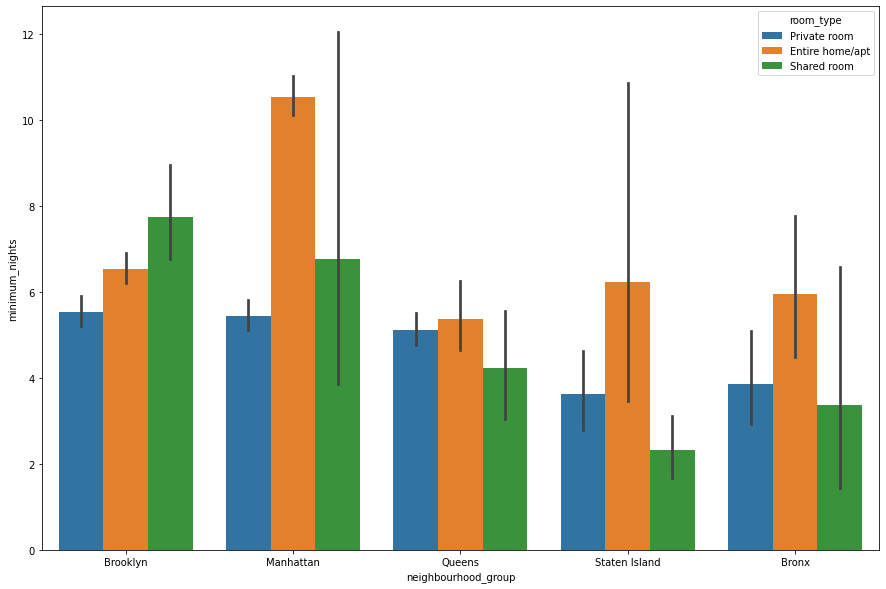

In [161]:
plt.figure(figsize=(15,10))
sns.barplot(data=data,x=data["neighbourhood_group"],y=data["minimum_nights"],hue=data["room_type"])
plt.show()

most people stayed more nights near manhattan neighbiurhoood


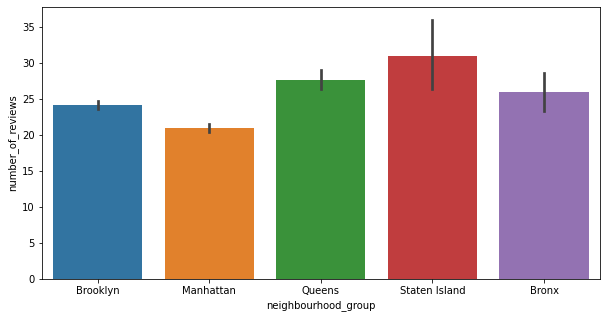

In [162]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x=data["neighbourhood_group"],y=data["number_of_reviews"])
plt.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

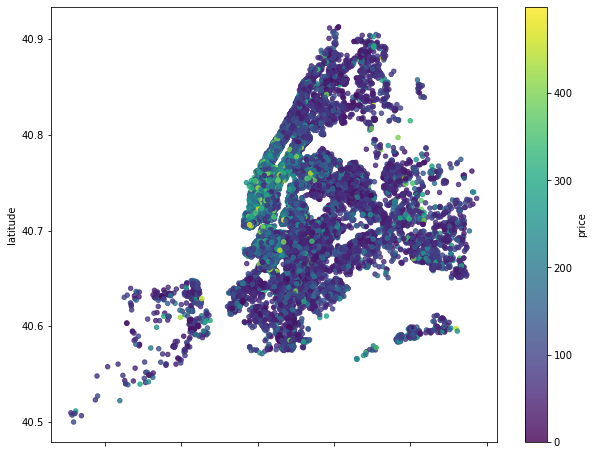

In [203]:
data[df].plot(kind="scatter",x="longitude",y="latitude",c="price",colorbar=True,cmap=plt.get_cmap("viridis"),alpha=0.8,figsize=(10,8))

In [247]:
maity=data.loc[data["neighbourhood"].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]

maity["neighbourhood"].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

<Figure size 1440x1080 with 0 Axes>

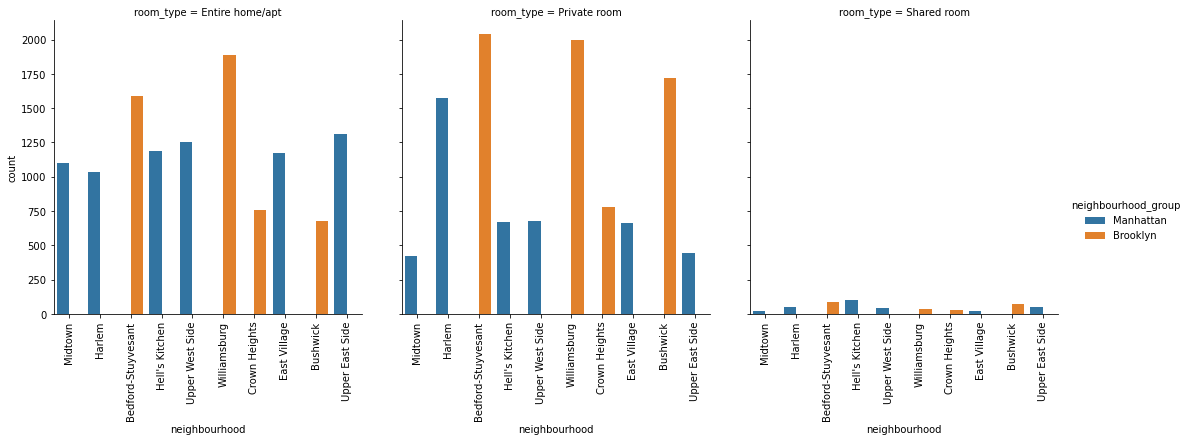

In [248]:
plt.figure(figsize=(20,15))
setting=sns.catplot(data=maity,x="neighbourhood",hue="neighbourhood_group",kind="count",col="room_type")
setting.set_xticklabels(rotation=90)
plt.show()